# BANK APP REVIEWS - BOA

In [498]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [499]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [500]:
warnings.filterwarnings("ignore")

In [501]:
# variable
BANK="BOA"

In [502]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [503]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/BOA_raw_reviews.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (1000, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,3559b91c-fad9-4032-bebe-cf99974b9628,Robel Alebachew,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hello, I’m facing a problem with the BOA Mobil...",1,0,NaN,2025-06-03 16:21:34,NaN,NaN
1,10e85f30-540d-4810-ba89-85a7e004480b,Haymanot Anberber,https://play-lh.googleusercontent.com/a/ACg8oc...,exceptional,5,0,NaN,2025-06-03 10:32:35,NaN,NaN
2,d7f07898-4ba1-47b4-9e8c-a3cc10b1bf0f,Mohamed Abdillahi,https://play-lh.googleusercontent.com/a-/ALV-U...,BoA Mobile good bank,5,0,25.05.03,2025-06-02 14:25:12,NaN,NaN
3,2ca9480b-ff5f-4b59-952c-5921db83dab2,Ahadu tech,https://play-lh.googleusercontent.com/a-/ALV-U...,this is worest app 24/7 loading,1,0,25.05.03,2025-06-01 15:51:10,NaN,NaN
4,8cd852da-0257-4ca0-9003-314fb464e55a,Fentaw Kefyalew,https://play-lh.googleusercontent.com/a-/ALV-U...,This App is not interest for Android phone Ple...,1,0,NaN,2025-06-01 10:17:10,NaN,NaN


### Dataset Overview

In [504]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
574,bc6a63ef-8e5b-4bed-ab4c-842c2f4731c9,Eebba waaqayyoo,https://play-lh.googleusercontent.com/a-/ALV-U...,It doesn't work 😔,1,0,24.04.26,2024-05-07 22:25:13,NaN,NaN
683,7408407d-e0b7-4a60-afcc-7408088fbe8c,tewodros worku,https://play-lh.googleusercontent.com/a/ACg8oc...,አፑ ቆንጆ ነበር አማርኛ ቋንቋ ቢካተት ሌላው በአሁን ሰዓት ይኼን ስፅፍ ...,5,2,NaN,2024-04-30 12:45:24,NaN,NaN
347,b42ad5f5-049c-49dc-a13c-39b7414793d0,Net3 MP,https://play-lh.googleusercontent.com/a/ACg8oc...,I don't know what is wrong with BOA as a bank ...,1,547,24.07.04,2024-08-03 23:59:13,NaN,NaN
17,f8bb86fb-594a-48ea-be1f-d08ea0882b8e,Dagar,https://play-lh.googleusercontent.com/a-/ALV-U...,Worst App ever. Totally unreliable. And it did...,1,4,25.05.03,2025-05-18 15:36:47,NaN,NaN
352,9813a786-cefe-4a1b-932e-e920944fadec,lulseged mam,https://play-lh.googleusercontent.com/a-/ALV-U...,It's a useless app,1,1,NaN,2024-08-02 09:54:12,NaN,NaN
44,f68ed25c-79db-4a9c-85e7-aaccd1671555,Joni Eden,https://play-lh.googleusercontent.com/a/ACg8oc...,faster bank of Abissinya,5,0,25.03.07,2025-04-08 16:36:23,NaN,NaN
562,d80c22c9-edd1-4e95-98c5-862949bb45f6,Yostina Mesfin,https://play-lh.googleusercontent.com/a/ACg8oc...,Great UI UX Design !!!,5,1,NaN,2024-05-09 20:51:50,NaN,NaN
817,93f8ce6e-057d-408e-9856-17dd32defbf9,Michael Mesfin,https://play-lh.googleusercontent.com/a-/ALV-U...,"This has to be your worst app ever, damm so ma...",1,2,24.02.07,2024-04-12 12:01:41,NaN,NaN
589,4912c5ac-685b-4f39-8a57-ed6332d80b71,Naod Yemane,https://play-lh.googleusercontent.com/a-/ALV-U...,Pls improve your mobile banking app it's doesn...,1,2,24.04.26,2024-05-05 17:38:54,NaN,NaN
482,fc50f8d9-0d2f-495f-8786-1e4670d229c7,DARE_RAYA_SWAIN,https://play-lh.googleusercontent.com/a-/ALV-U...,slow only some times the wey it is veary nice app,5,1,24.05.07,2024-06-05 01:26:08,NaN,NaN


In [505]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
995,832b30a2-1ab9-476f-838d-e96b1f50da03,Abebayehu mussa,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice,5,2,24.01.09,2024-02-03 16:46:47,NaN,NaN
996,000ef73f-978b-4c50-a44a-9c57cbc5c69e,ww,https://play-lh.googleusercontent.com/a/ACg8oc...,A massive improvement from the previous app. M...,5,6,24.01.09,2024-02-03 13:04:16,NaN,NaN
997,a0cf0ff4-f795-42d9-ada0-e31effdbc5ab,Kassahun Berihun,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,5,2,24.01.09,2024-02-03 12:47:25,NaN,NaN
998,e6c09bb3-ef33-47b7-99c3-3b6b20ea79b8,Beti Abreham,https://play-lh.googleusercontent.com/a/ACg8oc...,Boa,5,2,NaN,2024-02-03 12:24:09,NaN,NaN
999,5dc77553-7476-4699-bb51-50ad587ad7ba,Kings Man,https://play-lh.googleusercontent.com/a/ACg8oc...,Thank you,5,3,NaN,2024-02-03 11:46:03,NaN,NaN


In [506]:
#shape of the dataset
df.shape

(1000, 10)

In [507]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [508]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1000.0,3.022,1.860908,1.0,1.0,3.0,5.0,5.0
thumbsUpCount,1000.0,9.118,74.268526,0.0,0.0,1.0,1.0,1805.0


In [509]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,1000,1000,3559b91c-fad9-4032-bebe-cf99974b9628,1
userName,1000,994,Alexander Abebe,2
userImage,1000,999,https://play-lh.googleusercontent.com/a-/ALV-U...,2
content,1000,855,Good,43
reviewCreatedVersion,727,10,24.02.07,146
at,1000,1000,2025-06-03 16:21:34,1
replyContent,23,8,"Dear customer, We are sorry for the inconvenie...",8
repliedAt,23,23,2024-02-22 15:40:34,1


In [510]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1000 non-null   object
 1   userName              1000 non-null   object
 2   userImage             1000 non-null   object
 3   content               1000 non-null   object
 4   score                 1000 non-null   int64 
 5   thumbsUpCount         1000 non-null   int64 
 6   reviewCreatedVersion  727 non-null    object
 7   at                    1000 non-null   object
 8   replyContent          23 non-null     object
 9   repliedAt             23 non-null     object
dtypes: int64(2), object(8)
memory usage: 78.2+ KB


In [511]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                1000
at                      1000
userImage                999
userName                 994
content                  855
thumbsUpCount             52
repliedAt                 23
reviewCreatedVersion      10
replyContent               8
score                      5
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [512]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [513]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
replyContent,977,97.70%
repliedAt,977,97.70%
reviewCreatedVersion,273,27.30%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
content,0,0.00%
score,0,0.00%
thumbsUpCount,0,0.00%
at,0,0.00%


### Missing Values

In [514]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,977,97.70%
repliedAt,977,97.70%
reviewCreatedVersion,273,27.30%


### Duplicates

In [515]:
#count duplicates
dq.count_duplicates()

0

In [516]:
#look at the duplicates
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


### Invalid Values

In [517]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [518]:
#saving the original dataset for later use
df_original=df.copy()

In [519]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 0 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
623,bb85e30f-03b1-480f-8895-dbbad4672753,Arefat Shifa,https://play-lh.googleusercontent.com/a/ACg8oc...,it doesnt work it crashes,1,0,NaN,2024-05-03 04:56:15,NaN,NaN
83,73ce76e4-b7a2-4ed8-b6fd-f9b388bdb4a6,Teddy Abayneh,https://play-lh.googleusercontent.com/a/ACg8oc...,what awesome apps. it is very simple to use an...,5,1,NaN,2025-03-09 11:34:30,NaN,NaN
974,b88feb0d-2419-4bb6-b4b5-0ceda385b47c,Beilul Gerezgiher,https://play-lh.googleusercontent.com/a-/ALV-U...,I like it so much,5,1,NaN,2024-02-06 10:02:29,NaN,NaN
113,06ad47bd-3a6a-45b4-ae10-6dd4170bc254,Chol Kur,https://play-lh.googleusercontent.com/a/ACg8oc...,Whenever I try to sign in app close please fix...,2,0,24.11.22,2025-01-21 19:34:22,NaN,NaN
688,68104af7-50d8-4340-b657-d94b6b993573,Asmamawu Abera,https://play-lh.googleusercontent.com/a-/ALV-U...,I never ever seen the worst commercial app lik...,1,16,24.04.26,2024-04-30 09:20:42,NaN,NaN


In [520]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [521]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
796,55d036fd-62af-4a91-8f76-af64da6f2c26,Nahita Deva,https://play-lh.googleusercontent.com/a-/ALV-U...,Wowww,5,1,24.02.07,2024-04-16 22:17:22,NaN,NaN
914,c1af4031-d14a-4239-b63f-a133902ad0f9,Minte Geresu,https://play-lh.googleusercontent.com/a/ACg8oc...,It's good app,5,1,24.02.07,2024-02-20 11:53:10,Thank you very much. Keep using our app,2024-02-22 15:51:10
303,9fa13def-7ef1-4e33-bbd4-24d4a4c2c1b0,Semere Berehe,https://play-lh.googleusercontent.com/a-/ALV-U...,I dont recommand it to any one,1,0,NaN,2024-08-23 11:05:36,NaN,NaN
200,553a157d-5f77-4f45-849e-6985fd3f61ca,tadiya Fantahun,https://play-lh.googleusercontent.com/a-/ALV-U...,Bast bank of ethiopia,5,1,24.09.30,2024-11-12 13:01:11,NaN,NaN
847,b3b60a0b-92ff-4c64-98f7-83f6e2a6ec70,tilahun yihunie,https://play-lh.googleusercontent.com/a/ACg8oc...,When writing amounts z app cannot insert decei...,3,4,24.02.07,2024-03-20 16:49:19,NaN,NaN


In [522]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] No completely empty columns found.


In [523]:
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,977,97.70%
repliedAt,977,97.70%
reviewCreatedVersion,273,27.30%


In [524]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion','replyContent','repliedAt'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion', 'replyContent', 'repliedAt']


In [525]:
dq.find_invalid_values()

{}

In [526]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [527]:
df=await dq.translate_non_english_text("content")

INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=good "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=af&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=very+good "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=af&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=best "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=good "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://tr

In [528]:
df.shape

(1000, 5)

In [530]:
df=dq.filter_english_text("content")

[INFO] Dropped 8 non-English rows from 'content' column.


### Inconsistencies and Inaccuracies

In [531]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [532]:
df=dq.convert_columns_to_datetime()

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       638 non-null    object
 1   content        638 non-null    object
 2   score          638 non-null    int64 
 3   thumbsUpCount  638 non-null    int64 
 4   at             638 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.9+ KB


In [534]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [535]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [536]:
df["bank"] = BANK  # add bank name column
df["source"] = "Google Store"  # add source column

In [537]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank,source
508,Please fix the app i doesn't belongs to Abbssi...,1,2024-05-22 05:01:58,Davinci Tube,0,BOA,Google Store
691,The latest update has a bug it keeps crashing....,3,2024-04-30 06:01:28,abdu Mamed,11,BOA,Google Store
151,The dirtiest application ever seen...,1,2024-12-20 19:09:23,Habtamu Mekonnen,0,BOA,Google Store
861,Always there a problem with this app it says c...,1,2024-03-09 15:38:49,Meried TSB7,2,BOA,Google Store
547,It is really make my life so much easy!,5,2024-05-12 08:28:12,Habtemariam Abate,3,BOA,Google Store
780,"This app is awesome, I like the features",5,2024-04-21 14:21:42,Elsa Alemayehu,1,BOA,Google Store
453,"Riddled with crashes, cant use it anymore. Ver...",1,2024-06-20 14:18:55,yonas sharew,3,BOA,Google Store
48,it's not work correctly... you must have updat...,1,2025-04-06 11:01:42,Teddy and Fli,2,BOA,Google Store
701,it keeps crashing,1,2024-04-29 17:28:37,Aron Nebiyu Bogale,1,BOA,Google Store
137,this app is not available,1,2025-01-02 08:46:51,Ismael Abdella,0,BOA,Google Store


## 6. Analyze & Visualize

In [538]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


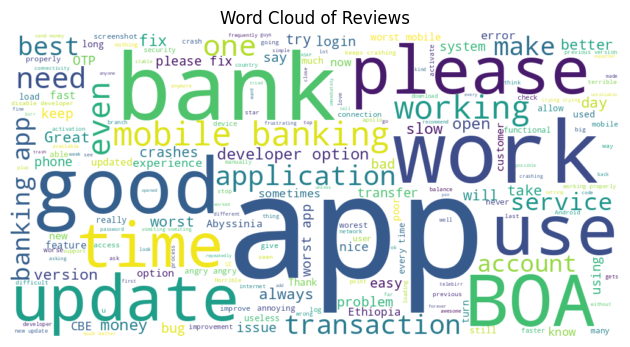

In [539]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


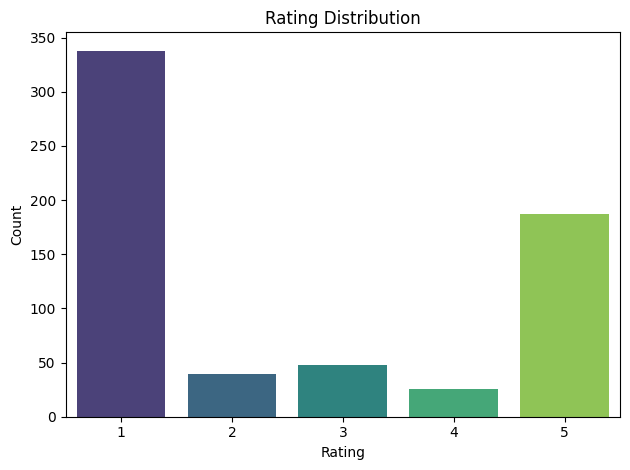

In [540]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


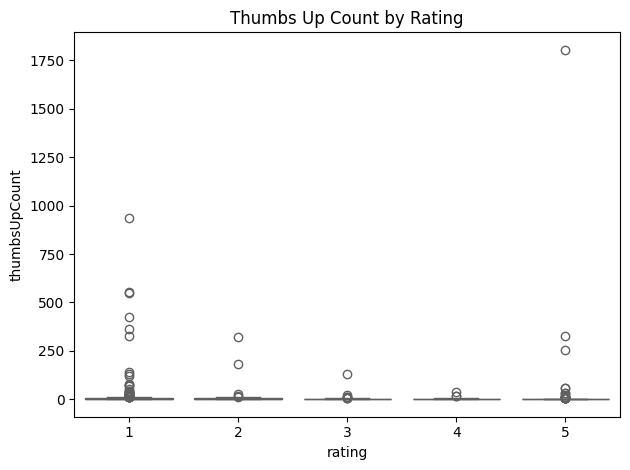

In [541]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


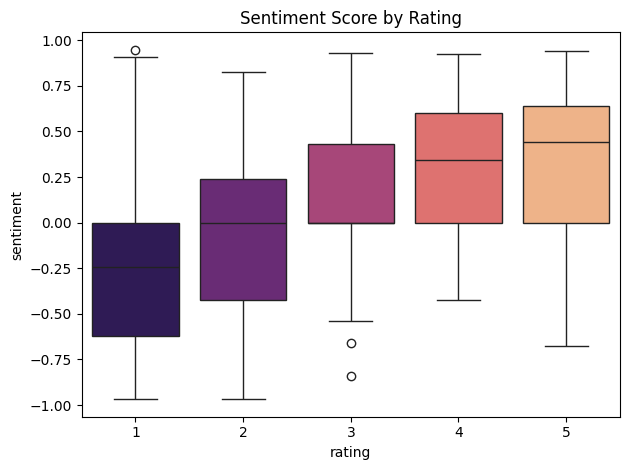

In [542]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [543]:
df=dq.drop_columns(['userName','thumbsUpCount'])

[INFO] Dropped columns: ['userName', 'thumbsUpCount']


### Export Cleaned Data

In [544]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

In [550]:
df.sample(15)

,review,rating,date,bank,source
266,How many hours should I wait after transferrin...,1,2024-09-15 20:36:11,BOA,Google Store
582,Worst application relative to other Ethiopia m...,1,2024-05-06 18:44:10,BOA,Google Store
862,It's bad,1,2024-03-09 13:08:19,BOA,Google Store
738,Nic app,5,2024-04-24 17:23:46,BOA,Google Store
235,If it is possible I would gove0 star,1,2024-10-08 16:20:37,BOA,Google Store
722,"Very slow response , try to some updates in th...",1,2024-04-27 03:02:30,BOA,Google Store
638,all the time updated but im not satisfy by boa...,1,2024-05-02 17:11:18,BOA,Google Store
623,it doesnt work it crashes,1,2024-05-03 04:56:15,BOA,Google Store
899,Worst application I ever used,1,2024-02-23 16:47:11,BOA,Google Store
780,"This app is awesome, I like the features",5,2024-04-21 14:21:42,BOA,Google Store
